# Real Clear Politics 2020 Election Poll Results

Tracking the 2020 poll results from real clear politics.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from rcp import get_polls, get_poll_data
from pprint import pprint

In [19]:
import seaborn as sns

In [20]:
sns.set(rc={'figure.figsize':(11, 4)})

## Grab and  Convert Data

In [45]:
def grab_and_convert_data(urls,cmonth=10.0):
    """Grab the data from the given list of urls, 
    store in a pandas dataframe with converted dates."""
    
    poll_results = pd.DataFrame({})
    for i in range(len(urls)):
        results = get_poll_data(urls[i])
        for result in results[0]['data']:
            result = pd.DataFrame(result,index=[i])
            poll_results = poll_results.append(result)
    dates = []
    for date in poll_results['Date']:
        end_date = date.split('-')[1] 
        month, day = end_date.split('/')
        #if float(month)>cmonth:
         #   date = end_date[1:]+'/18'
        #else:
        date = end_date[1:]+'/19'
        dates.append(date)
    dates = pd.to_datetime(dates)
    poll_results['Date'] = dates
    poll_results = poll_results.sort_values('Date', ascending=True)
    poll_results = poll_results.set_index('Date')
 
    # convert anything that makes sense to into a float
    for col in poll_results.columns:
        poll_results[col] = poll_results[col].astype(float,errors='ignore')
    return poll_results

## Democratic Primary Candidates

In [46]:
all_polls = get_polls()
dem_polls_urls = [data['url'] for data in all_polls if 'democratic_presidential_nomination' in data['url']]

In [47]:
dem_results = grab_and_convert_data(dem_polls_urls)

In [48]:
old_results = 'MonmouthMonmouth'
dem_results = dem_results.query('Poll!=@old_results')

In [49]:
def plot_with_resampling(results,data_columns,resample_length='W'):
    sampled_mean = results[data_columns].resample(resample_length).median()
    fig, ax = plt.subplots()
    for candidate in data_columns:
        ax.plot(results[candidate],
        marker='.', linestyle='-', linewidth=0.5,)
        ax.plot(sampled_mean[candidate],
        marker='o', markersize=8, linestyle='-', label=candidate)
    ax.set_ylabel('Poll Results')
    ax.legend();

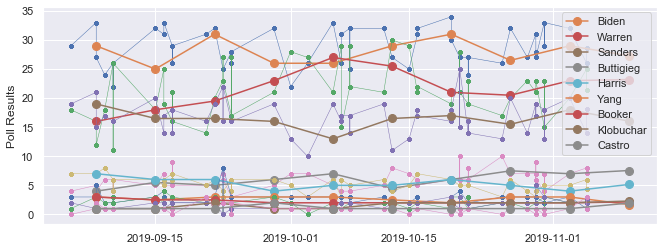

In [50]:
candidates = ['Biden', 'Warren', 'Sanders', 'Buttigieg', 'Harris', 'Yang','Booker', 'Klobuchar', 'Castro']
plot_with_resampling(dem_results,candidates)

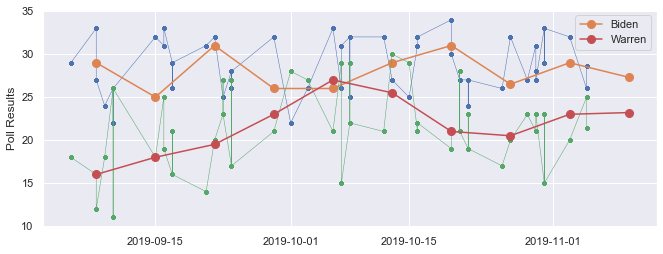

In [51]:
candidates = ['Biden', 'Warren']
plot_with_resampling(dem_results,candidates)

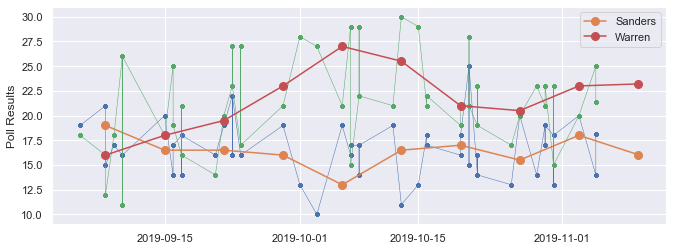

In [52]:
candidates = ['Sanders', 'Warren']
plot_with_resampling(dem_results,candidates)

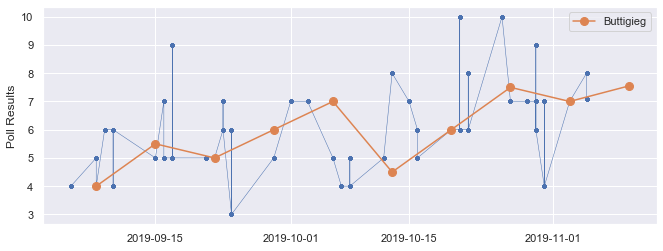

In [53]:
candidates = ['Buttigieg']
plot_with_resampling(dem_results,candidates)

## Trump vs. Warren

Grab the Warren polls and convert the results.

In [54]:
polls = get_polls(q="Warren") #, p="Fox"

In [55]:
len(polls)

31

In [56]:
polls_info = pd.DataFrame({})
i = 0
for poll in polls:
    #td = get_poll_data(poll['url'])
    poll = pd.DataFrame(poll,index=[i])
    polls_info = polls_info.append(poll)
    i = i+1
poll_results = grab_and_convert_data(polls_info['url'].values)

/Users/Emily/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


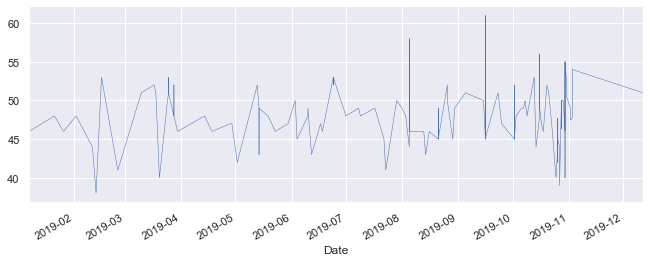

In [57]:
poll_results['Warren (D)'].plot(linewidth=0.5);

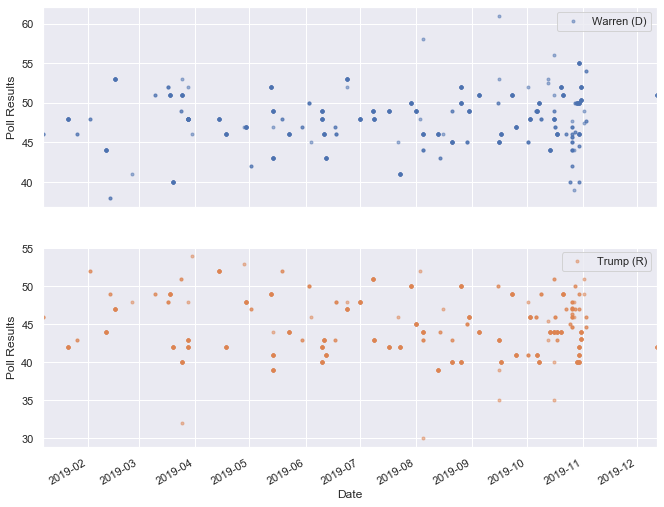

In [58]:
cols_plot = ['Warren (D)', 'Trump (R)']
axes = poll_results[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Poll Results')

In [59]:
data_columns = ['Warren (D)', 'Trump (R)']
# Resample to weekly frequency, aggregating with mean
polls_monthly_mean = poll_results[data_columns].resample('M').mean()

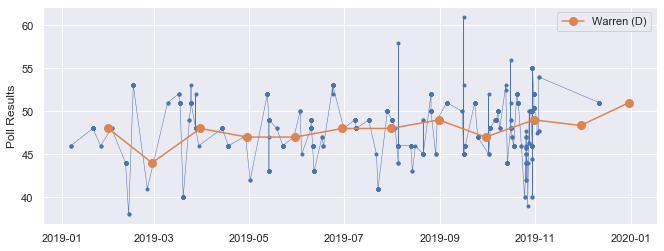

In [60]:
candidates = ['Warren (D)']
plot_with_resampling(poll_results,candidates,'M')

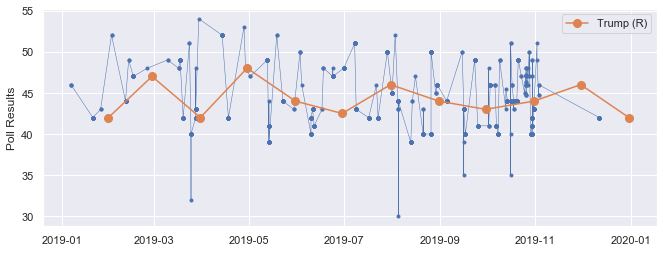

In [61]:
candidates = ['Trump (R)']
plot_with_resampling(poll_results,candidates,'M')

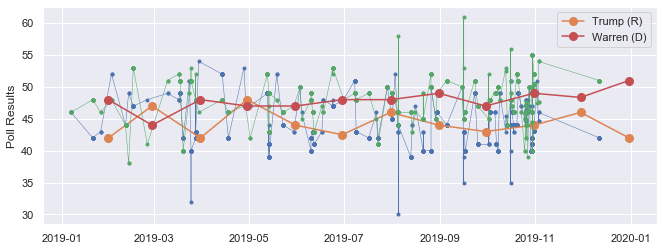

In [62]:
candidates = ['Trump (R)','Warren (D)',]
plot_with_resampling(poll_results,candidates,'M')

Registered vs. Likely voters

In [63]:
poll_results.columns

Index(['MoE', 'Poll', 'Sample', 'Spread', 'Trump (R)', 'Warren (D)'], dtype='object')

In [64]:
likely_voters = poll_results[poll_results['Sample'].str.contains("LV")]

In [65]:
registered_voters = poll_results[poll_results['Sample'].str.contains("RV")]

In [66]:
data_columns = ['Warren (D)', 'Trump (R)']
# Resample to weekly frequency, aggregating with mean
LV_monthly_mean = likely_voters[data_columns].resample('W').mean()
RV_monthly_mean = registered_voters[data_columns].resample('W').mean

In [67]:
likely_voters

,MoE,Poll,Sample,Spread,Trump (R),Warren (D)
Date,,,,,,
2019-01-26,4.0,Detroit News/WDIV-TVDetroit News,600 LV,Warren +3,43.0,46.0
2019-01-26,4.0,Detroit News/WDIV-TVDetroit News,600 LV,Warren +3,43.0,46.0
2019-02-13,4.0,OH Predictive InsightsPredictive Insights,600 LV,Trump +11,49.0,38.0
2019-02-13,4.0,OH Predictive InsightsPredictive Insights,600 LV,Trump +11,49.0,38.0
2019-05-02,4.0,OH Predictive InsightsPredictive Insights,600 LV,Trump +5,47.0,42.0
2019-05-02,4.0,OH Predictive InsightsPredictive Insights,600 LV,Trump +5,47.0,42.0
2019-05-23,1.5,Rasmussen ReportsRasmussen,5000 LV,Warren +2,44.0,46.0
2019-05-23,1.5,Rasmussen ReportsRasmussen,5000 LV,Warren +2,44.0,46.0
2019-05-23,1.5,Rasmussen ReportsRasmussen,5000 LV,Warren +2,44.0,46.0
